# Stock Market Prediction using Decision Tree

In [1]:
# x) Remove redundant ticker symbols after dataframe is loaded?
# x) Inferences like vaccine stock spike, boom in AI, EV
# x) Combined data from NSE(Indian) and NASDAQ(American) companies
# x) Predictions for future or just last 100 days?
# x) Error/Accuracy/Precision Calculation
# x) Combined data from NSE(Indian) and NASDAQ(American) companies

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn.metrics

from datetime import datetime, timedelta
from dateutil import relativedelta

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

# Data

In [6]:
data = pd.read_csv("NASDAQ Symbols.csv")
data.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,AACG,ATA Creativity Global American Depositary Shares,$1.40,-0.05,-3.448%,4.583600e+07,China,2008.0,12942,Consumer Discretionary,Educational Services
1,AACIW,Armada Acquisition Corp. I Warrant,$0.06,0.00,0.00%,0.000000e+00,United States,2021.0,84274,Finance,Blank Checks
2,AADI,Aadi Bioscience Inc. Common Stock,$8.19,0.06,0.738%,2.001389e+08,United States,NaN,84735,Health Care,Biotechnology: Pharmaceutical Preparations
3,AAL,American Airlines Group Inc. Common Stock,$14.93,0.12,0.81%,9.703035e+09,United States,NaN,15840018,Consumer Discretionary,Air Freight/Delivery Services
4,AAME,Atlantic American Corporation Common Stock,$2.15,0.05,2.381%,4.378954e+07,United States,NaN,6947,Finance,Life Insurance


In [7]:
def symbol_search():
    print("---Portfolio Analyis---")
    key1 = "y"
    key2 = ""
    symbols = []
    while key1.lower() == "y":
        search_term = input("Enter the company name:")
        if search_term == "":
            continue
        print("Companies found with matching string to", search_term, "are")
        for index, row in data.iterrows():
            string = row[1]
            if not(pd.isna(string)) and search_term.lower() in str(string).lower(): # Checking for NA values
                flag = 1
                print(string)
                key2 = input("Do you want to add this company? (Y/N)")
                if key2.lower() == "y":
                    symbols.append(row[0])
        if flag != 1:
            print("No matching companies were found.")
        key1 = input("Enter N to exit, Y to continue adding companies")
    return symbols   

In [8]:
# input
# Portfolio Stocks
symbols = symbol_search()

---Portfolio Analyis---
Companies found with matching string to apple are
Apple Inc. Common Stock
Pineapple Energy Inc. Common Stock


In [10]:
# Upload date
flag  = 0
flag2 = 0
while(flag == 0):
    start = input("Enter the date from which analysis should be started(in yyyy-mm-dd format)")
    end = input("Enter the date from which analysis should end (in yyyy-mm-dd format)")
    d1 = datetime.strptime(start, "%Y-%m-%d")
    d2 = datetime.strptime(end, "%Y-%m-%d")
    delta = d2-d1
    if delta < timedelta(days = 100):
        print("Dates should be more than 100 days apart")
        continue
    else:
        flag = 1       


In [11]:
df2 = pd.DataFrame()
for s in symbols:
    df2[s] = yf.download(s,start,end)["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
df2.tail()

,AAPL,PEGY
Date,,
2023-02-24,146.507355,1.87
2023-02-27,147.715683,1.86
2023-02-28,147.206390,1.82
2023-03-01,145.109283,1.80
2023-03-02,145.708466,1.77


In [13]:
import pandas as pd

future_days = 100

columns = []
for symbol in symbols:
    column_name = "Prediction_{}".format(symbol)  # Generate column name based on the symbol
    columns.append(column_name)  # Append column name to list
    df2[column_name] = df2[symbol].shift(-future_days)  # Create new column shifted 100 units/rows up

In [14]:
df2.tail()

,AAPL,PEGY,Prediction_AAPL,Prediction_PEGY
Date,,,,
2023-02-24,146.507355,1.87,NaN,NaN
2023-02-27,147.715683,1.86,NaN,NaN
2023-02-28,147.206390,1.82,NaN,NaN
2023-03-01,145.109283,1.80,NaN,NaN
2023-03-02,145.708466,1.77,NaN,NaN


In [15]:
df2.head(101)

,AAPL,PEGY,Prediction_AAPL,Prediction_PEGY
Date,,,,
2020-02-03,75.377312,12.834235,89.550117,10.007543
2020-02-04,77.865791,12.939434,86.798645,10.134758
2020-02-05,78.500740,13.023594,88.799057,10.325579
2020-02-06,79.418953,13.002552,89.540314,10.749628
2020-02-07,78.339439,13.023594,89.370956,10.283174
...,...,...,...,...
2020-06-19,85.838921,10.770830,114.261620,8.926219
2020-06-22,88.084785,10.134758,117.729767,8.756600
2020-06-23,89.964951,9.901531,117.453896,8.799006


In [16]:
X = np.array(df2.drop(columns, axis = 1))[:-future_days]
print(X)

[[ 75.37731171  12.83423519]
 [ 77.86579132  12.93943405]
 [ 78.50074005  13.0235939 ]
 ...
 [145.43452454   1.42999995]
 [145.7331543    2.75999999]
 [144.76756287   4.55000019]]


In [17]:
y = np.array(df2[columns])[:-future_days]
print(y)

[[ 89.55011749  10.00754261]
 [ 86.79864502  10.134758  ]
 [ 88.79905701  10.32557869]
 ...
 [147.20639038   1.82000005]
 [145.10928345   1.79999995]
 [145.70846558   1.76999998]]


# Linear and Decision Tree Regression

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [20]:
# Create empty dictionaries to store the models
lr_models = {}
tree_models = {}

# Iterate over the columns of x_train and y_train
for i in range(x_train.shape[1]):
    column_x = x_train[:, i]
    column_y = y_train[:, i]

    # Train Linear Regression model
    lr_model = LinearRegression().fit(column_x.reshape(-1, 1), column_y.reshape(-1, 1))
    lr_models[i] = lr_model
    
    # Train Decision Tree Regression model
    tree_model = DecisionTreeRegressor().fit(column_x.reshape(-1, 1), column_y.reshape(-1, 1))
    tree_models[i] = tree_model

# Prediction using Linear Model

In [68]:
x_future = df2.drop(columns, axis = 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future.shape

(100, 2)

In [69]:
lr_prediction = {}
for i in range(x_future.shape[1]):
    lr_prediction[i] = lr_models[i].predict(x_future[:,i].reshape(-1, 1))
    print(lr_prediction[i])
len(lr_prediction)

[[146.86426277]
 [148.60215993]
 [144.64727661]
 [143.01741222]
 [143.13013141]
 [145.72289627]
 [144.43121107]
 [144.50636681]
 [146.03758569]
 [148.79004207]
 [148.41427779]
 [148.35322457]
 [149.52748253]
 [146.78911424]
 [147.14608237]
 [148.35322457]
 [148.00095007]
 [145.50212268]
 [142.91407308]
 [140.44814435]
 [140.86147208]
 [142.1155794 ]
 [139.59328387]
 [140.29784008]
 [142.32224326]
 [142.07800153]
 [143.44952888]
 [145.04182982]
 [145.04182982]
 [143.05967651]
 [143.90045611]
 [142.72149731]
 [143.75953189]
 [144.99485028]
 [145.63364522]
 [147.24472068]
 [147.56881178]
 [146.54955893]
 [147.01456704]
 [146.84078021]
 [148.24049096]
 [149.03898464]
 [147.58290708]
 [149.42884422]
 [150.38702222]
 [151.47204355]
 [150.88021373]
 [150.34475793]
 [149.71066383]
 [152.14840195]
 [152.41144703]
 [154.83509705]
 [154.36540252]
 [153.6608391 ]
 [156.53542356]
 [156.38511208]
 [156.27694232]
 [156.05116508]
 [156.07468369]
 [158.10661398]
 [157.75384921]
 [159.45182529]
 [159.96

2

In [70]:
predictions2 = {}
valid2 = df2[X.shape[0]:]
for i in range(x_future.shape[1]):
    predictions2[i] = lr_prediction[i]
    symbol=symbols[i]
    column_name = "Test_Prediction_{}".format(symbol)  # Generate column name based on the symbol
    valid2[column_name] = predictions2[i]  # Append column name to list

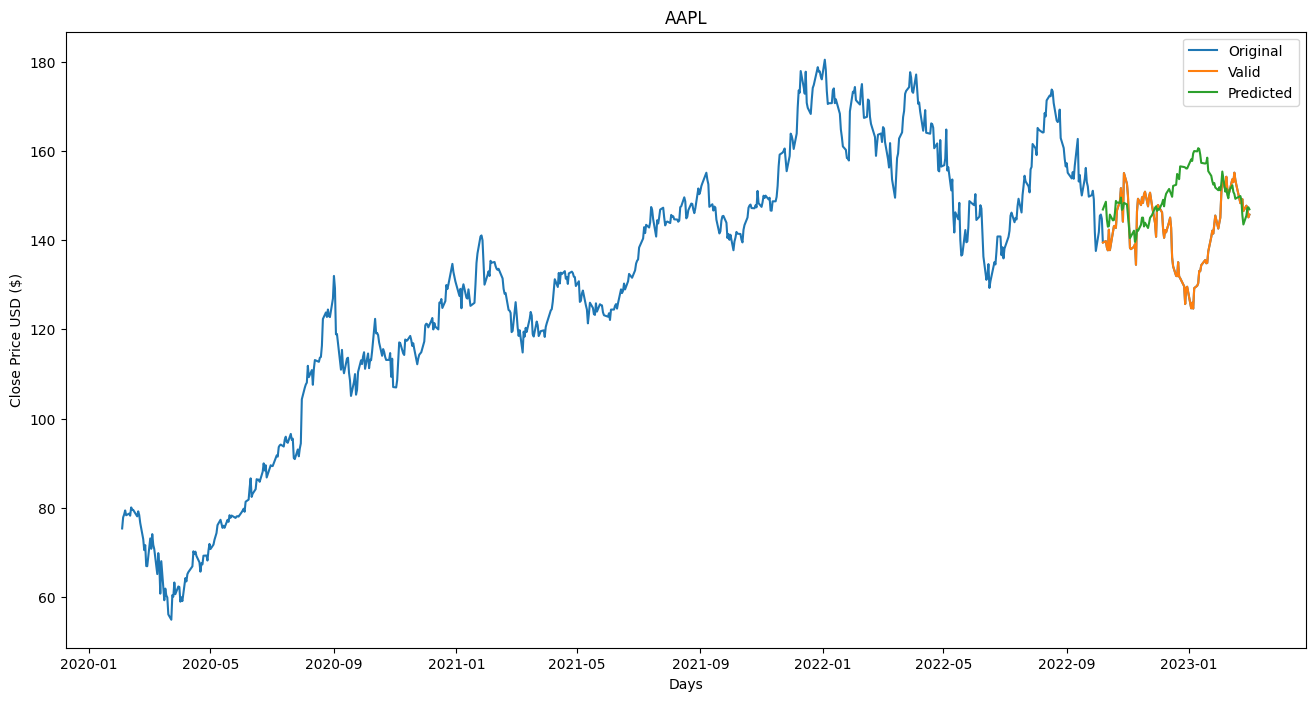

The MSE is  179.89836256217575
The RMSE is  13.412619526482354
The MAE is  9.30358078406774
The mean is 142.55111206054687


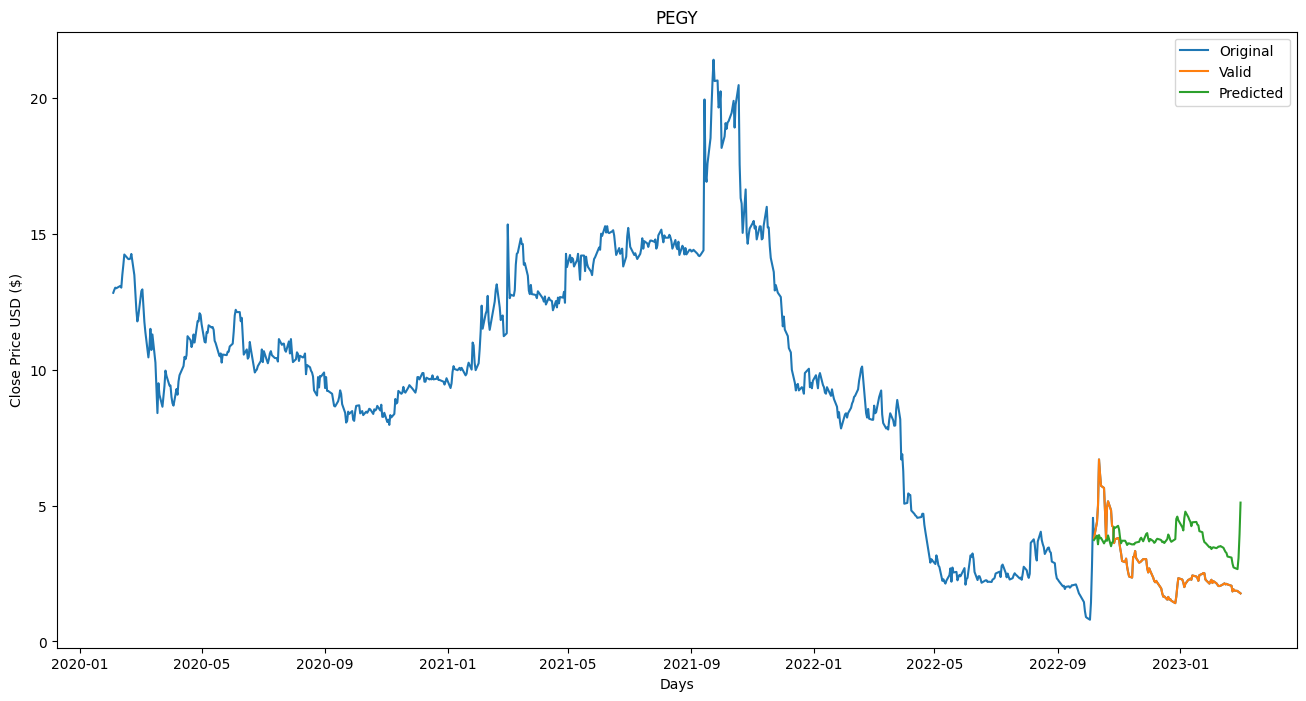

The MSE is  2.390041194406665
The RMSE is  1.5459758065398905
The MAE is  1.3897909095384944
The mean is 2.718199989795685


In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = rmse = mae = r2 = 0


for symbol in symbols:
    test_symbol = "Test_Prediction_{}".format(symbol)  # Generate column name based on the symbol
    plt.figure(figsize=(16,8))
    plt.title(symbol)
    plt.xlabel("Days")
    plt.ylabel("Close Price USD ($)")
    plt.plot(df2[symbol])
    plt.plot(valid2[[symbol,test_symbol]])
    rmse = np.sqrt(mse)
    plt.legend(["Original", "Valid", "Predicted"])
    plt.show()
    mae = mean_absolute_error(valid2[symbol], valid2[test_symbol])
    mse = mean_squared_error(valid2[symbol], valid2[test_symbol])
    rmse = np.sqrt(mse)
    print("The MSE is ", mse)
    print("The RMSE is ", rmse)
    print("The MAE is ", mae)
    print("The mean is", (valid2[symbol].mean()))

# Prediction using Decision Trees

In [73]:
tree_prediction = {}
for i in range(x_future.shape[1]):
    tree_prediction[i] = tree_models[i].predict(x_future[:,i].reshape(-1, 1))
    print(tree_prediction[i])
len(tree_prediction)

[177.82705688 139.78039551 138.34693909 137.70985413 142.33869934
 137.74967957 141.76132202 143.09521484 155.45245361 142.73686218
 146.59918213 155.03060913 151.64610291 173.04878235 144.14044189
 155.03060913 152.64154053 149.96379089 144.36938477 138.24739075
 137.97817993 138.51661682 139.09494019 145.34674072 146.44352722
 138.51661682 146.50735474 148.35795593 148.35795593 137.70985413
 160.01264954 159.62600708 149.74391174 150.63134766 147.67993164
 143.80123901 140.76008606 165.31137848 147.87934875 147.38079834
 146.20423889 142.49504089 140.53076172 142.23579407 141.7472229
 144.07044983 151.28942871 142.79417419 136.1036377  134.11941528
 131.98564148 131.91584778 135.0566864  164.06781006 131.47712708
 151.06874084 125.67402649 171.31608582 129.55271912 136.31602478
 125.9930954  124.65697479 129.77207947 129.77207947 130.35040283
 133.10238647 145.79940796 134.36869812 134.81739807 134.81739807
 134.87722778 137.46966553 140.70027161 142.11613464 141.4480896
 143.5419921

2

In [74]:
predictions = {}
valid = df2[X.shape[0]:]
for i in range(x_future.shape[1]):
    predictions[i] = tree_prediction[i]
    symbol=symbols[i]
    column_name = "Test_Prediction_{}".format(symbol)  # Generate column name based on the symbol
    valid[column_name] = predictions[i]  # Append column name to list

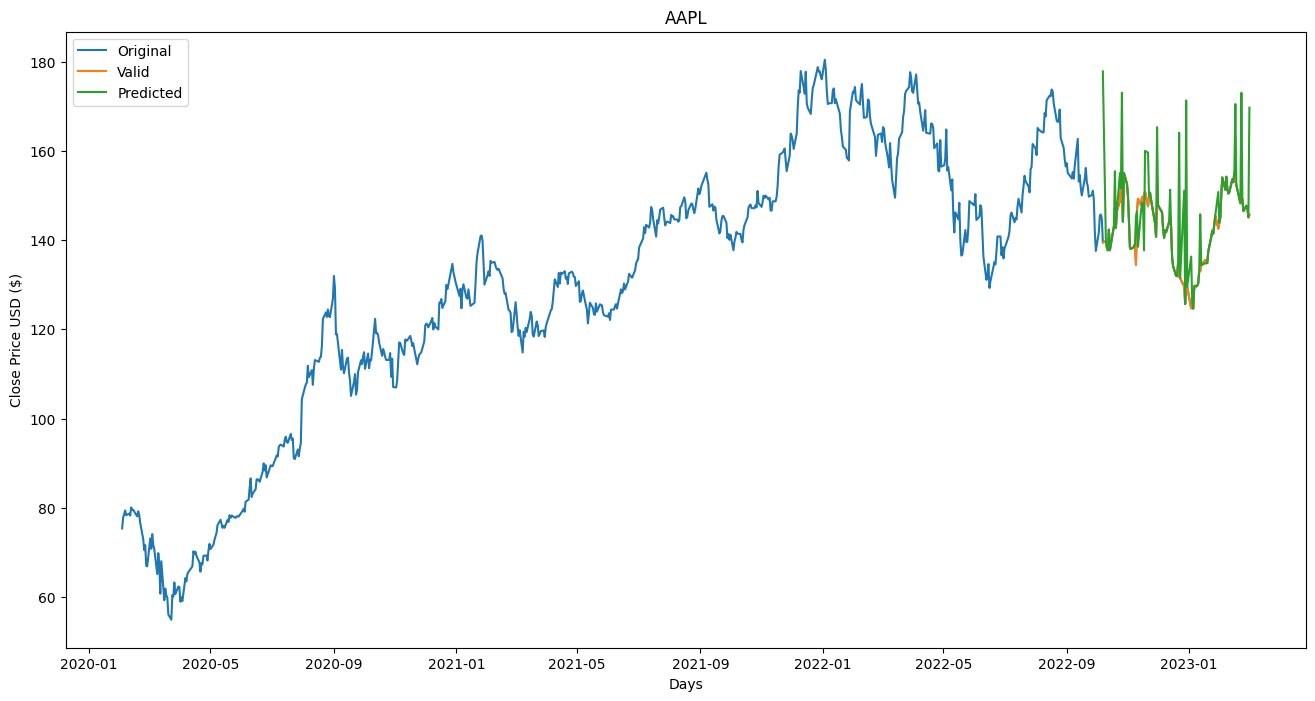

The MSE is  83.23402559520503
The RMSE is  9.123268361459342
The MAE is  3.58101188659668
The mean is 142.55111206054687


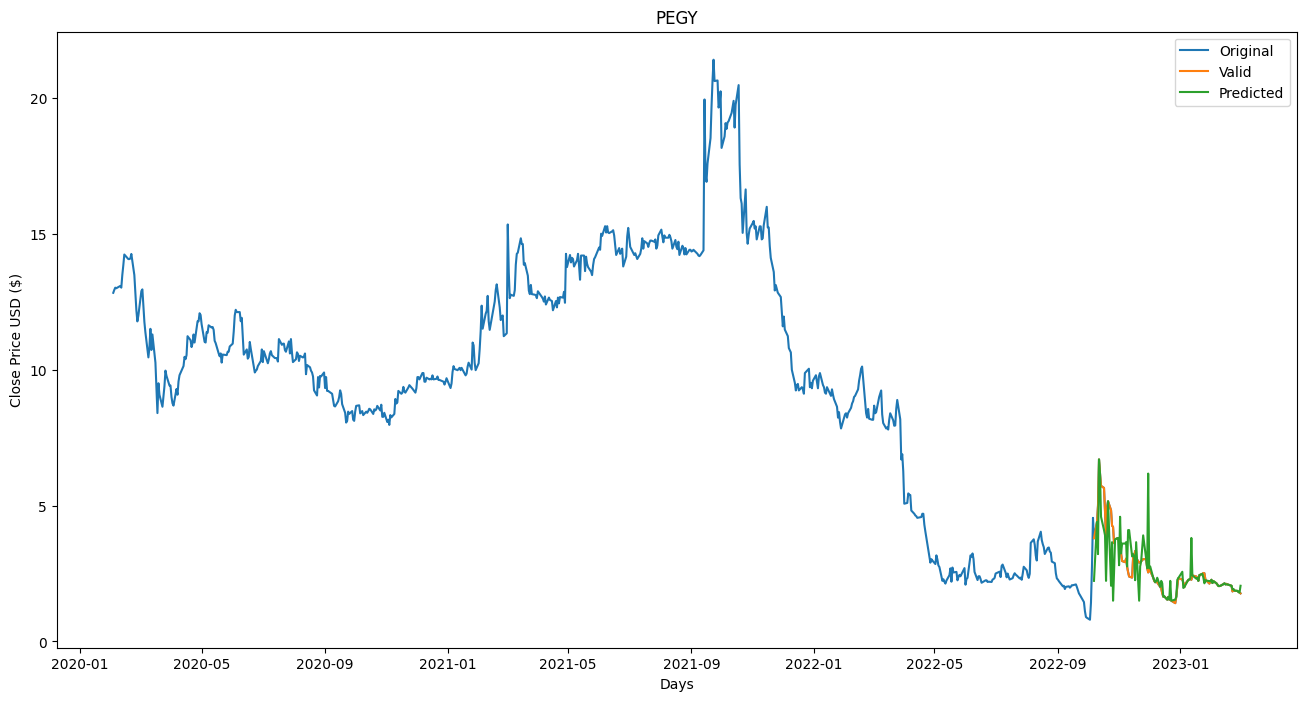

The MSE is  0.6136013983554082
The RMSE is  0.7833271336775002
The MAE is  0.3811833347876866
The mean is 2.718199989795685


In [75]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = rmse = mae = r2 = 0


for symbol in symbols:
    test_symbol = "Test_Prediction_{}".format(symbol)  # Generate column name based on the symbol
    plt.figure(figsize=(16,8))
    plt.title(symbol)
    plt.xlabel("Days")
    plt.ylabel("Close Price USD ($)")
    plt.plot(df2[symbol])
    plt.plot(valid[[symbol,test_symbol]])
    plt.legend(["Original", "Valid", "Predicted"])
    plt.show()
    mae = mean_absolute_error(valid[symbol], valid[test_symbol])
    mse = mean_squared_error(valid[symbol], valid[test_symbol])
    rmse = np.sqrt(mse)
    print("The MSE is ", mse)
    print("The RMSE is ", rmse)
    print("The MAE is ", mae)
    print("The mean is", (valid[symbol].mean()))
